## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer')
data_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.
mousers=data_df["Mouse ID"].value_counts()
num_mousers= len(mousers)
num_mousers

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice


array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_miceall_df = data_df.loc[data_df["Mouse ID"]=="g989", :]
dup_miceall_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data= data_df[data_df['Mouse ID'].isin(dup_miceall_df)==False]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice in the clean DataFrame.
cleaned_mousers = cleaned_data["Mouse ID"].value_counts()
num_cleaned_mousers=len(cleaned_mousers)
num_cleaned_mousers

249

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
variance = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
std_dev = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()
med = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
drugGroup = cleaned_data.groupby('Drug Regimen')
grouped_tog = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":med, "Tumor Volume Variance":variance, "Tumor Volume Std Dev": std_dev, "Tumor Volume Error":sem})
grouped_tog

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var', 'std','sem'])
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Trials')

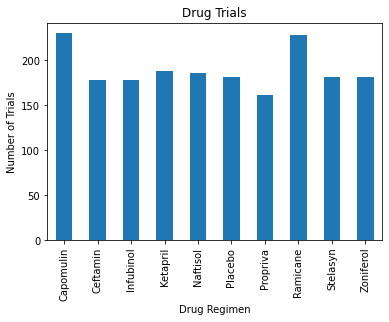

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_together = pd.DataFrame(cleaned_data.groupby(['Drug Regimen']).count()).reset_index()
tot_count = group_together[['Drug Regimen', 'Mouse ID']]
tot_count.columns = ['Drug Regimen', 'Number of Trials']
tot_count = tot_count.set_index('Drug Regimen') 
fig1 = tot_count.plot(kind='bar', title='Drug Trials', legend= False)
fig1.set_ylabel('Number of Trials')


Text(0.5, 1.0, 'Mice on Drugs')

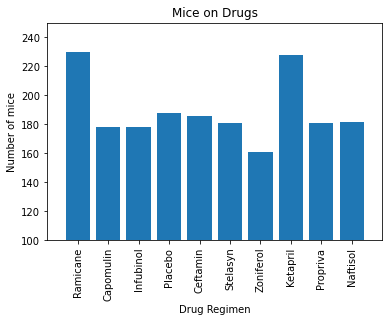

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xaxis = cleaned_data['Drug Regimen'].unique().tolist()
yaxis = drugGroup ['Mouse ID'].count().tolist()
plt.bar(xaxis, yaxis)
plt.xlim(-1,10)
plt.xticks(rotation = 90)
plt.ylim(100, 250)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice')
plt.title('Mice on Drugs')


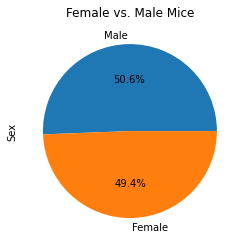

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = cleaned_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

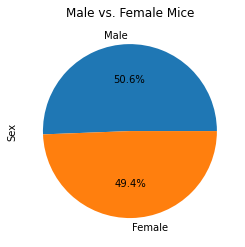

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs. Female Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# mouse_id= cleaned_data.groupby('Mouse ID')
# max_df = mouse_id.max()
# mouse_id.max()
# drug_regimen = max_df.groupby('Drug Regimen')
# print(max_df)
Final_tumor = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
All_Rows = data_df.loc[cleaned_data["Drug Regimen"].isin(Final_tumor)]
greatest_tp= All_Rows.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tp_merged=pd.merge(data_df, greatest_tp, how= "right", on= ["Mouse ID", "Timepoint"])
greatest_tp_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_list= cleaned_data['Drug Regimen'].unique()
# print(drug_list)
# treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data=[]
# Create empty list to fill with tumor vol data (for plotting)
# tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor_vol=greatest_tp_merged.loc[greatest_tp_merged["Drug Regimen"]==drug, 'Tumor Volume (mm3)']
    
for drug in Final_tumor:
    tumor_vol=greatest_tp_merged.loc[greatest_tp_merged["Drug Regimen"]==drug] ['Tumor Volume (mm3)']
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(tumor_vol)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
   

    lower_bound = quartiles[0.25]
    upperq = quartiles[0.75]
#     iqr = upperq-lowerq
    print(f"The lower quartile  is: {lowerq}")
    print(f"The upper quartile  is: {upperq}")
    print(f"The interquartile range  is: {iqr}")
    print(f"The the median  is: {quartiles[0.5]}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    Outlier_Var = tumor_vol.loc[(tumor_vol<lower_bound)| (tumor_vol>upper_bound)]
    print(f"{len(Outlier_Var)}")

The lower quartile  is: 32.37735684
The upper quartile  is: 40.1592203
The interquartile range  is: 7.781863460000004
The the median  is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0
The lower quartile  is: 31.56046955
The upper quartile  is: 40.65900627
The interquartile range  is: 9.098536719999998
The the median  is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
0
The lower quartile  is: 54.04860769
The upper quartile  is: 65.52574285
The interquartile range  is: 11.477135160000003
The the median  is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
1
The lower quartile  is: 48.72207785
The upper quartile  is: 64.29983003
The interquartile range  is: 15.577752179999997
The the median  is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be ou

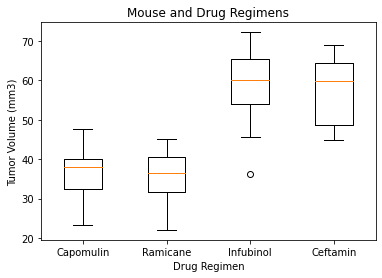

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Mouse and Drug Regimens')
plt.xlabel("Drug Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.boxplot (tumor_vol_data ,labels= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()
# plt.title('Mouse and Drug Regimens')
# plt.xlabel("Drug Regimen")
# plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Weight (g)')

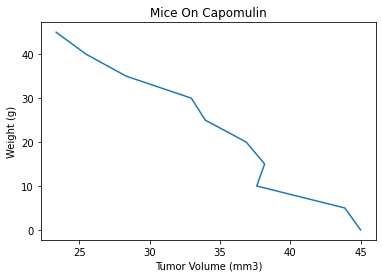

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capo_treated = All_Rows.loc[All_Rows['Drug Regimen']== 'Capomulin']
Capo_treated
Single_mouser = Capo_treated.loc[All_Rows['Mouse ID']=='s185']
plt.plot(Single_mouser['Tumor Volume (mm3)'],(Single_mouser['Timepoint']))
plt.title("Mice On Capomulin")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

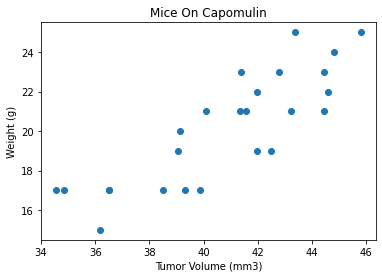

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# x_values =Avg_merge['Tumor Volume (mm3)']
Capo_weight = Capo_treated.groupby('Mouse ID').mean()["Tumor Volume (mm3)"]
plt.title("Mice On Capomulin")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
Avg_merge = pd.merge(Capo_weight, mouse_metadata, on='Mouse ID')
plt.scatter(Avg_merge['Tumor Volume (mm3)'], Avg_merge['Weight (g)'])

## Correlation and Regression

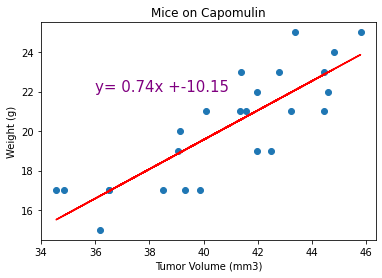

Correlation coefficient is: 0.84


In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coeff = round(st.pearsonr(x_values, y_values)[0],2)
x_values = Avg_merge['Tumor Volume (mm3)']
y_values= Avg_merge['Weight (g)']
plt.title("Mice on Capomulin")
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y= "+str(round(slope,2)) + "x +"+str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (36,22),fontsize=15, color="purple")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

print(f'Correlation coefficient is: {correlation_coeff}')